In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

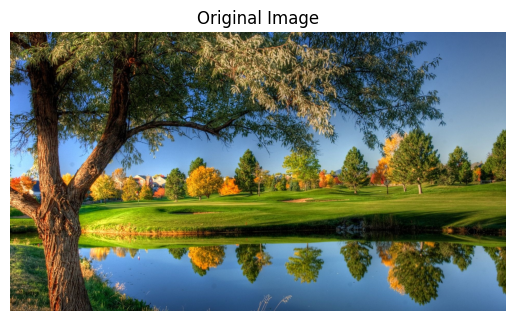

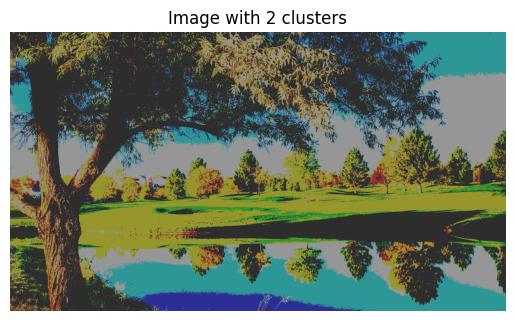

For k =  2 Cost:  6631811751.323906


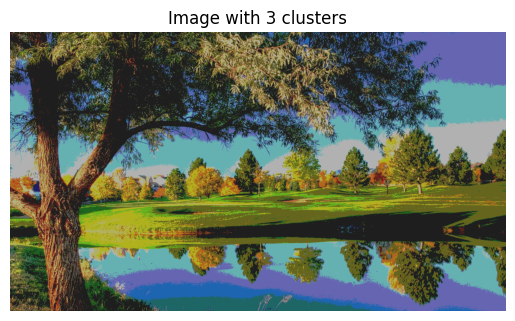

For k =  3 Cost:  3097903952.2964506


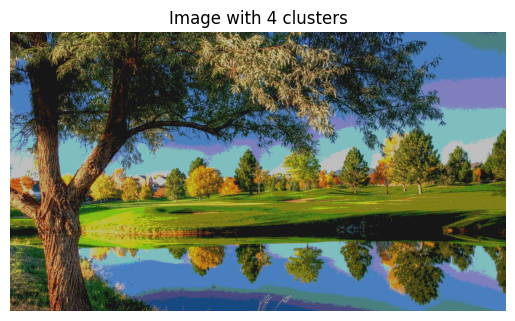

For k =  4 Cost:  1803594181.9570603


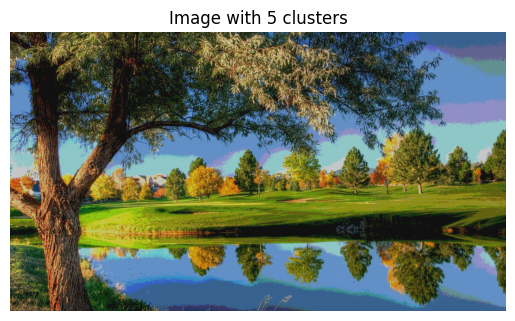

For k =  5 Cost:  1227307280.107466


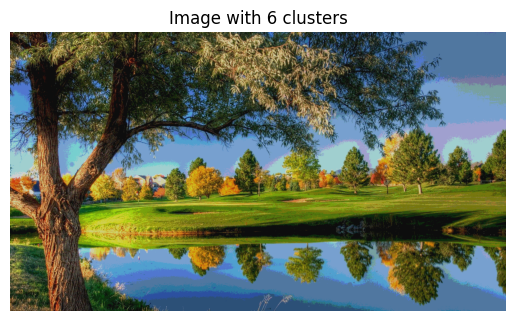

For k =  6 Cost:  857939937.2599839


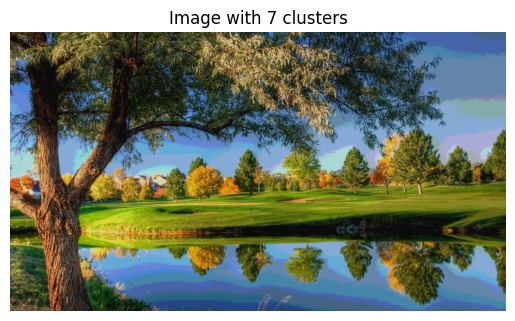

For k =  7 Cost:  640154726.9097561


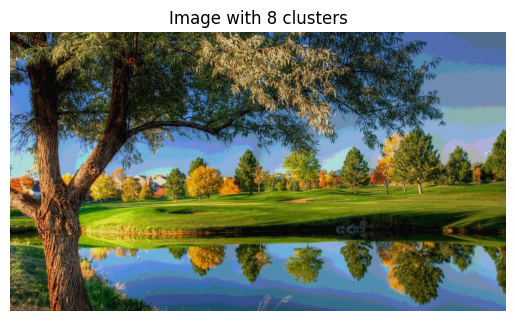

For k =  8 Cost:  507286005.758888


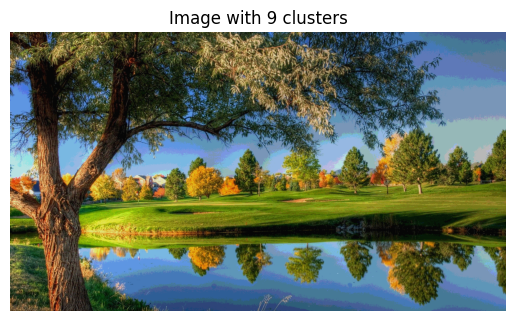

For k =  9 Cost:  398116308.46869886


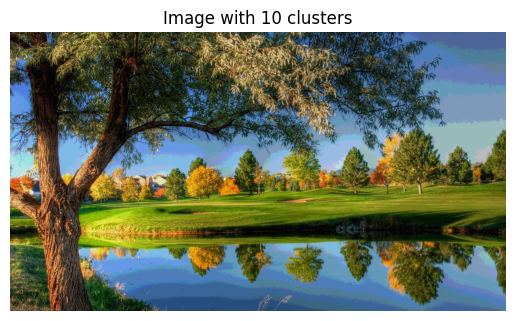

For k =  10 Cost:  334814462.3098418


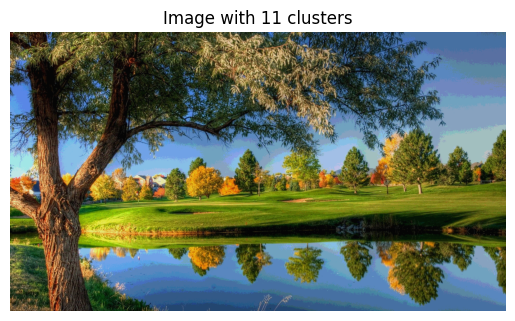

For k =  11 Cost:  272676155.21203256


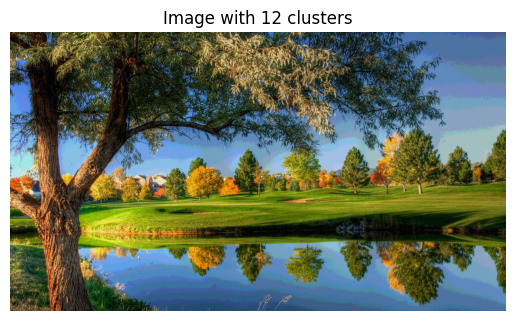

For k =  12 Cost:  241076217.19080365


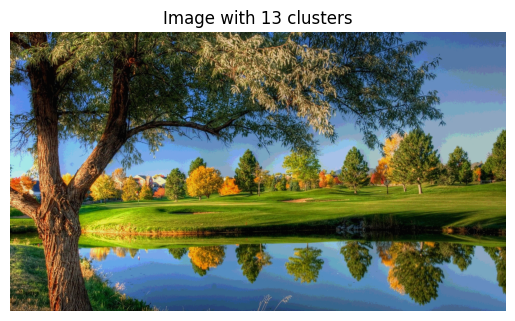

For k =  13 Cost:  209033626.8007725


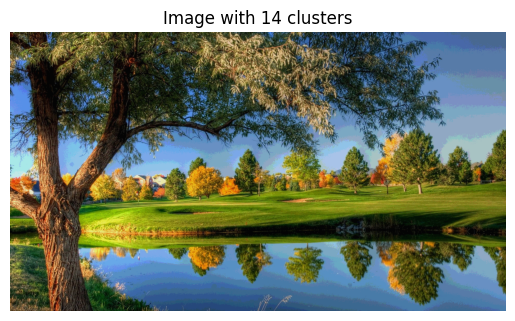

For k =  14 Cost:  190801097.37486702


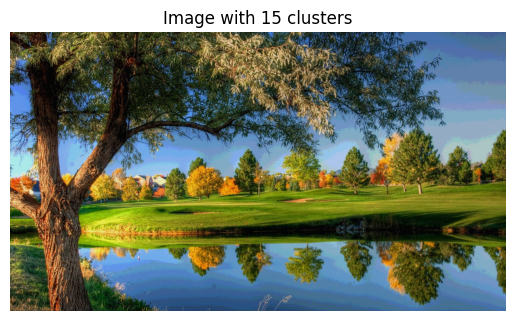

For k =  15 Cost:  165851446.58861664


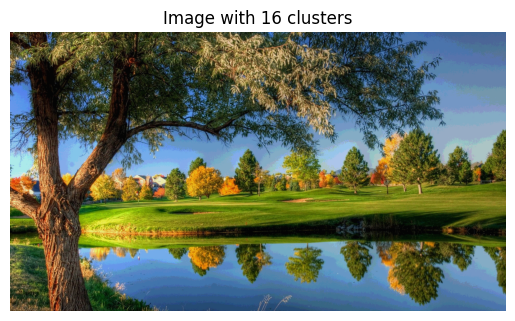

For k =  16 Cost:  149606223.39972904


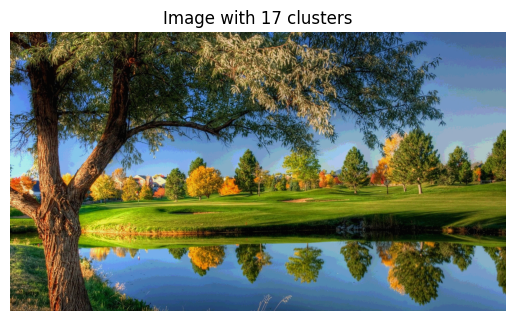

For k =  17 Cost:  138873895.28966343


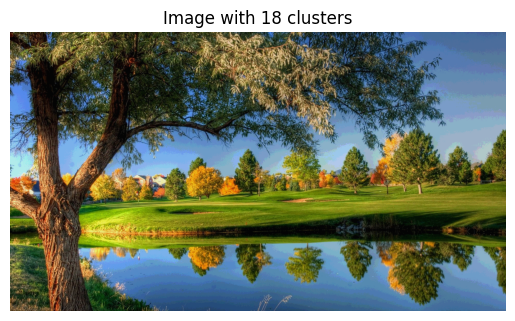

For k =  18 Cost:  126253423.19752438


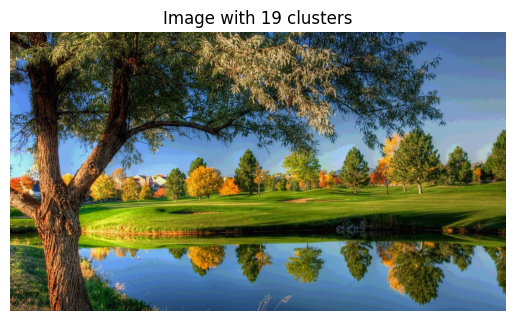

For k =  19 Cost:  117131617.02839461


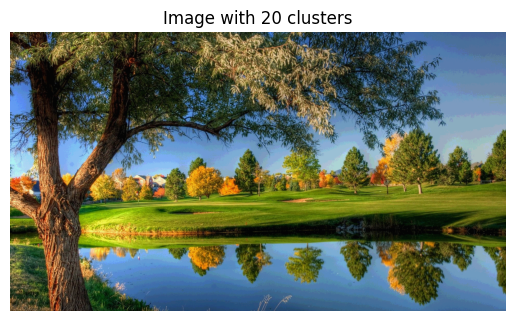

For k =  20 Cost:  95777671.2368896


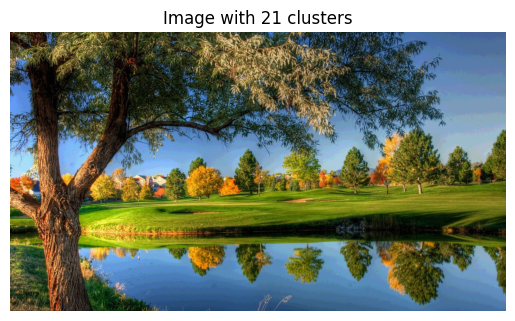

For k =  21 Cost:  77579429.24368823


C:\Users\Mr  Rabbani\AppData\Local\Temp\ipykernel_12264\3606627887.py:25: RuntimeWarning: invalid value encountered in scalar divide
  new_centroids[i] = np.sum(e_vectors[:, i] * pixels) / np.sum(e_vectors[:, i])
C:\Users\Mr  Rabbani\AppData\Local\Temp\ipykernel_12264\3606627887.py:38: RuntimeWarning: invalid value encountered in scalar divide
  new_centroids[i] = np.sum(e_vectors[:, i] * pixels) / np.sum(e_vectors[:, i])


In [87]:
def k_means_clustering (k, image):
    # Reshaping the image to 1D
    pixels = image.reshape(-1)

    # choosing k random pixels as initial centroids
    np.random.seed(0) # keeping seed constant for reproducibility
    centroids = np.random.choice(pixels, k)
    
    # calculating the distance of each pixel from the centroids
    distances = np.zeros((pixels.shape[0],k))

    for i, centroid in enumerate(centroids):
        distances[:, i] = np.abs(pixels - centroid).astype(np.float64) 

    # initializing eigenvectors with shape (pixels, k)
    e_vectors = np.zeros((pixels.shape[0],k))

    # assigning 1 to the closest centroid and 0 to the others
    for i in range(k):
        e_vectors[:, i] = (distances.argmin(axis=1) == i).astype(np.float64)

    # calculating the new centroids
    new_centroids = np.zeros(k)
    for i in range(k):
        new_centroids[i] = np.sum(e_vectors[:, i] * pixels) / np.sum(e_vectors[:, i])

    # Repeating the process until the centroids do not change
    while not np.allclose(centroids, new_centroids):
        centroids = new_centroids
        
        # distance calcualtion from the centroids
        distances = np.zeros((pixels.shape[0],k))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.abs(pixels - centroid).astype(np.float64)
            
        # Assignment of pixels to the closest centroid
        e_vectors = np.zeros((pixels.shape[0],k))
        for i in range(k):
            e_vectors[:, i] = (distances.argmin(axis=1) == i).astype(np.float64)
        
        # Calculation of new centroids
        new_centroids = np.zeros(k)
        for i in range(k):
            new_centroids[i] = np.sum(e_vectors[:, i] * pixels) / np.sum(e_vectors[:, i])
       
    # calculating the cost function
    cost = 0
    for i in range(k):
        cost += np.sum(e_vectors[:, i] * (pixels - new_centroids[i]) ** 2)
            
    # replacing the pixels with the centroids
    for i in range(k):
        pixels[e_vectors[:, i] == 1] = new_centroids[i]
        
    # reshaping the image to 3D orignal shape
    new_image = pixels.reshape(image.shape)
    
    # Convert BGR image to RGB for displaying with matplotlib
    new_image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    
    # Displaying the original image
    plt.imshow(new_image_rgb)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(f'Image with {k} clusters')
    plt.show()
    
    
    return cost


# Load the image
image = cv2.imread('Nature.jpg')

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Original Image')
plt.show()

costs = []
for k in range(2, 25):
    image = cv2.imread('Nature.jpg')
    cost = k_means_clustering(k, image)
    costs.append(cost)
    print ("For k = ", k, "Cost: ", cost)
    

# Plot the cost function
plt.plot(range(2, 25), costs)
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Cost function')
plt.show()

